In [36]:
# 导入所需的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
# 准备数据
x = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([2, 3, 5, 6, 8])

In [38]:
x

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [39]:
# 创建模型对象并拟合数据
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [40]:
# 预测新数据并输出结果
x_new = np.array([6]).reshape((-1, 1))
y_new = model.predict(x_new)
print(y_new)

[9.3]


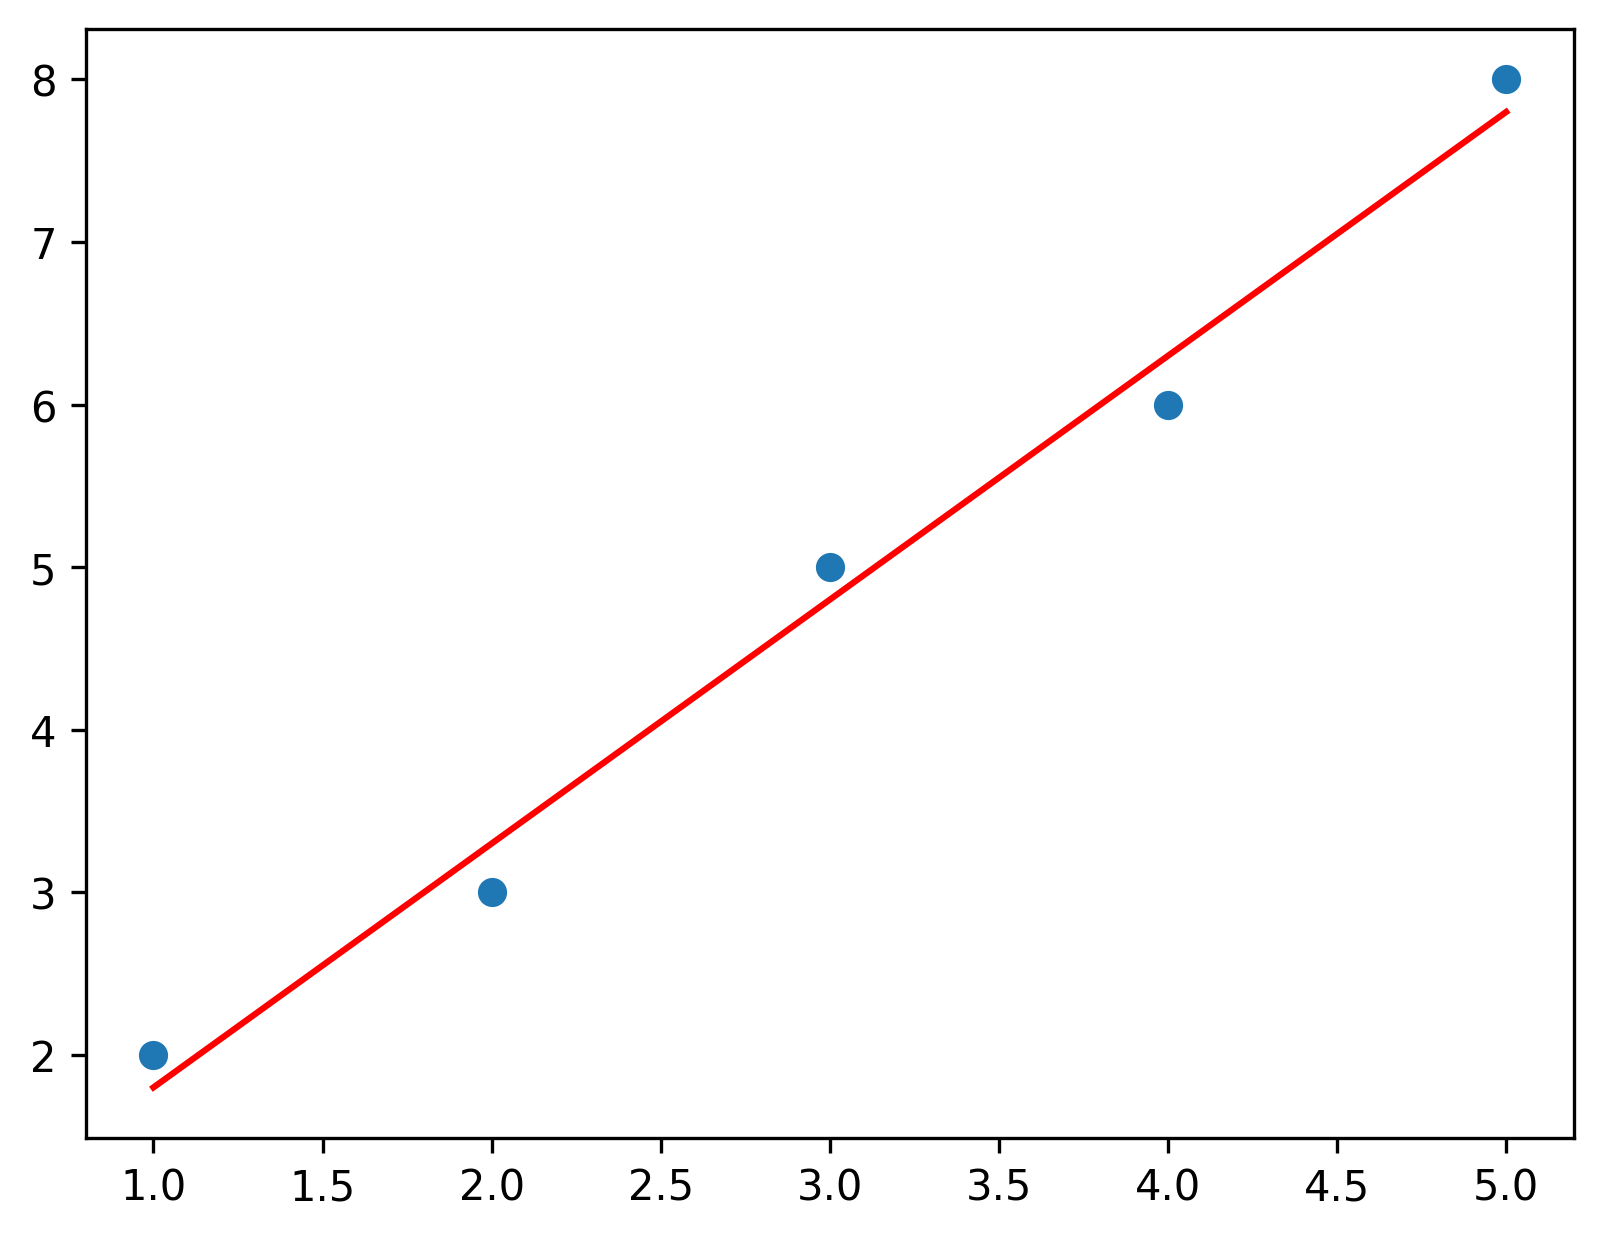

In [41]:
# 绘制回归线和数据点
plt.figure(dpi=300)#这里添加一行控制图像大小的代码
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.savefig('figs/3-1.png', dpi=300)
plt.show()

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p + \epsilon $$

In [42]:
# 查看模型的系数和截距
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

Coefficients:  [1.5]
Intercept:  0.3000000000000007


# ChatGPT演示梯度下降的代码

In [43]:
# 构造数据
x = np.linspace(0, 10, num=100)
y = 2 * x + 1 + np.random.normal(0, 1, size=100)

In [44]:
# 定义损失函数
def loss_function(theta, x, y):
    y_pred = np.dot(x, theta)
    return np.mean((y_pred - y) ** 2)

In [45]:
# 定义梯度函数
def gradient(theta, x, y):
    y_pred = np.dot(x, theta)
    error = y_pred - y
    return np.dot(error, x) / len(y)

In [46]:
# 初始化模型参数
theta = np.zeros(2)

# 设置学习率和迭代次数
learning_rate = 0.01
n_iterations = 1000

# 执行梯度下降算法
for i in range(n_iterations):
    grad = gradient(theta, np.column_stack((np.ones(len(x)), x)), y)
    theta -= learning_rate * grad
    loss = loss_function(theta, np.column_stack((np.ones(len(x)), x)), y)
    if i % 100 == 0:
        print(f"Iteration {i}: loss = {loss}, theta = {theta}")

Iteration 0: loss = 65.86880732607911, theta = [0.10813527 0.70806164]
Iteration 100: loss = 1.0828362989111797, theta = [0.45705904 2.04586689]
Iteration 200: loss = 1.0567545690588858, theta = [0.56976706 2.02892009]
Iteration 300: loss = 1.040887912368646, theta = [0.65767525 2.0157022 ]
Iteration 400: loss = 1.0312355313359596, theta = [0.72624046 2.00539272]
Iteration 500: loss = 1.025363565904359, theta = [0.77971886 1.9973517 ]
Iteration 600: loss = 1.0217913925812012, theta = [0.82143008 1.99107999]
Iteration 700: loss = 1.0196182833557952, theta = [0.85396332 1.98618829]
Iteration 800: loss = 1.0182962859949922, theta = [0.87933808 1.98237294]
Iteration 900: loss = 1.0174920571962103, theta = [0.89912948 1.9793971 ]


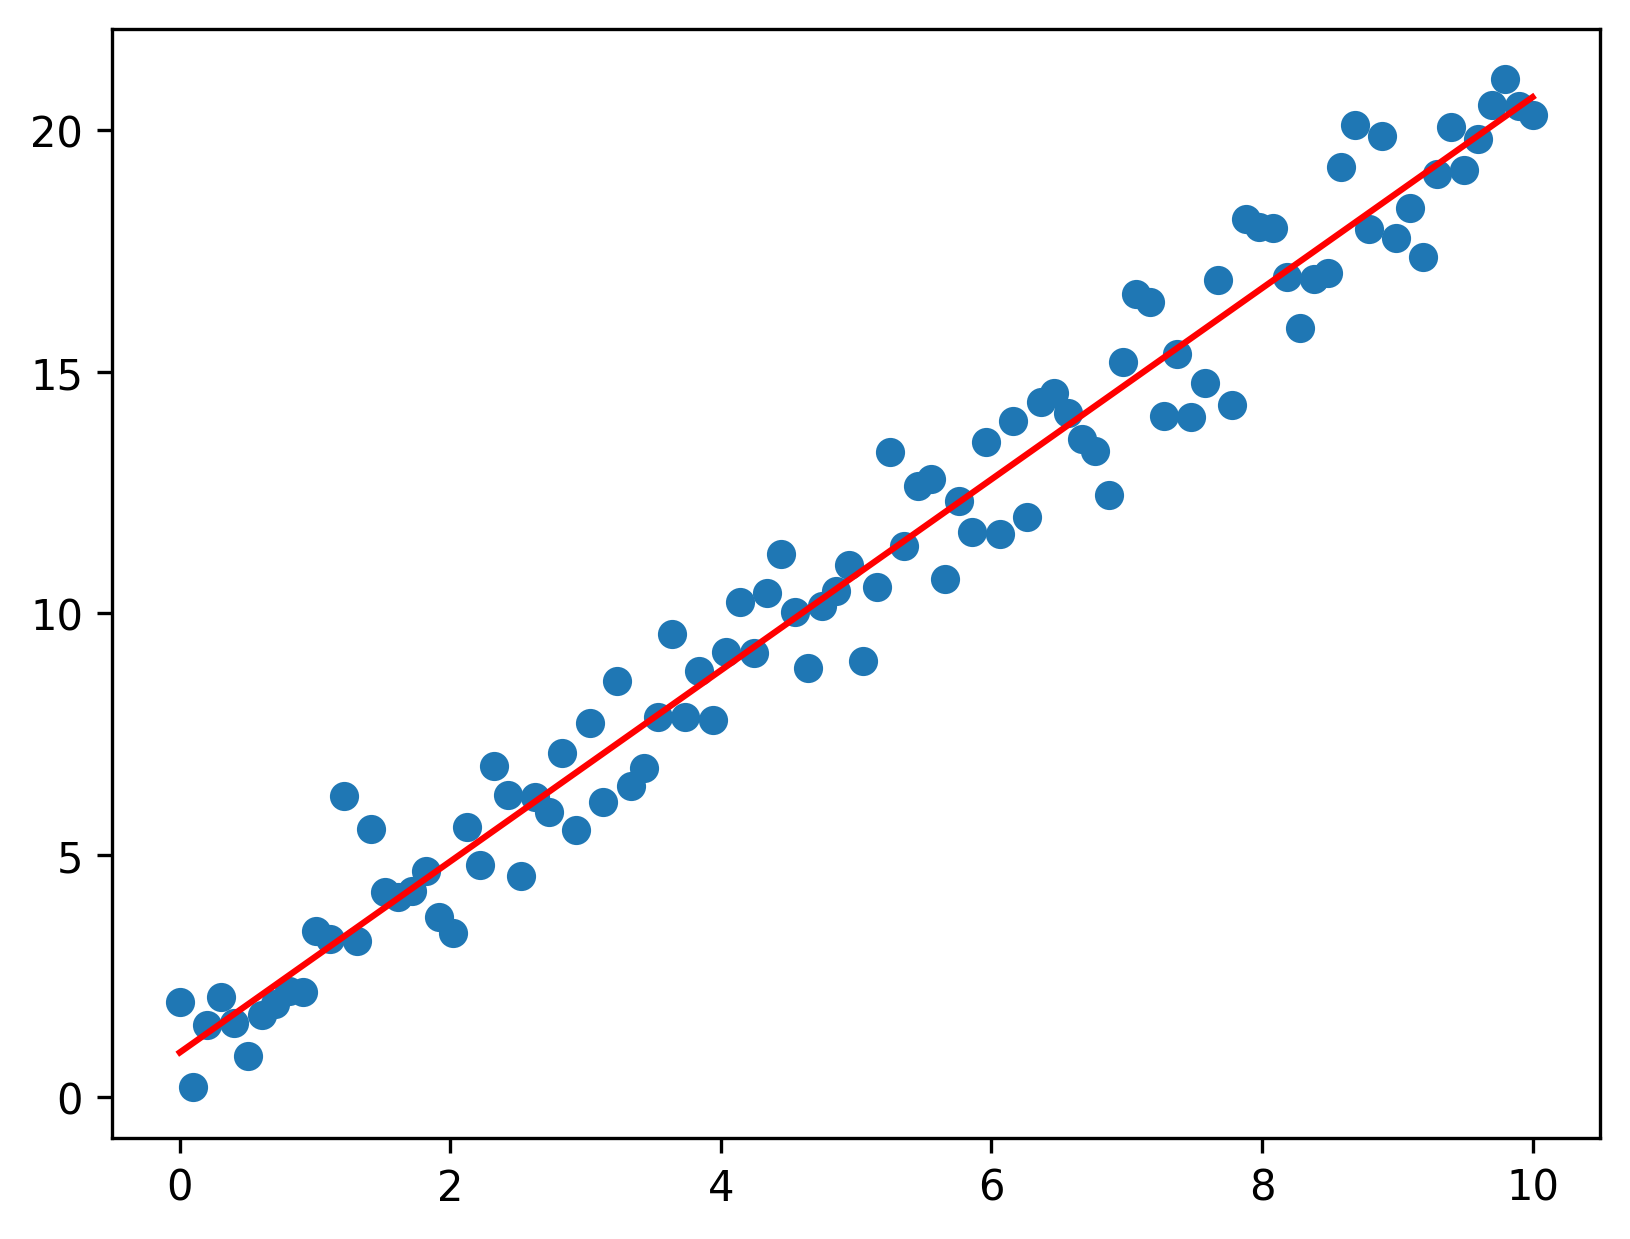

In [47]:
# 绘制结果
plt.figure(dpi=300)#添加控制图像大小的代码
plt.scatter(x, y)
plt.plot(x, np.dot(np.column_stack((np.ones(len(x)), x)), theta), color='red')
plt.savefig('figs/3-2.png', dpi=300)
plt.show()

# 演示sigmoid

In [48]:
# 定义sigmoid函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

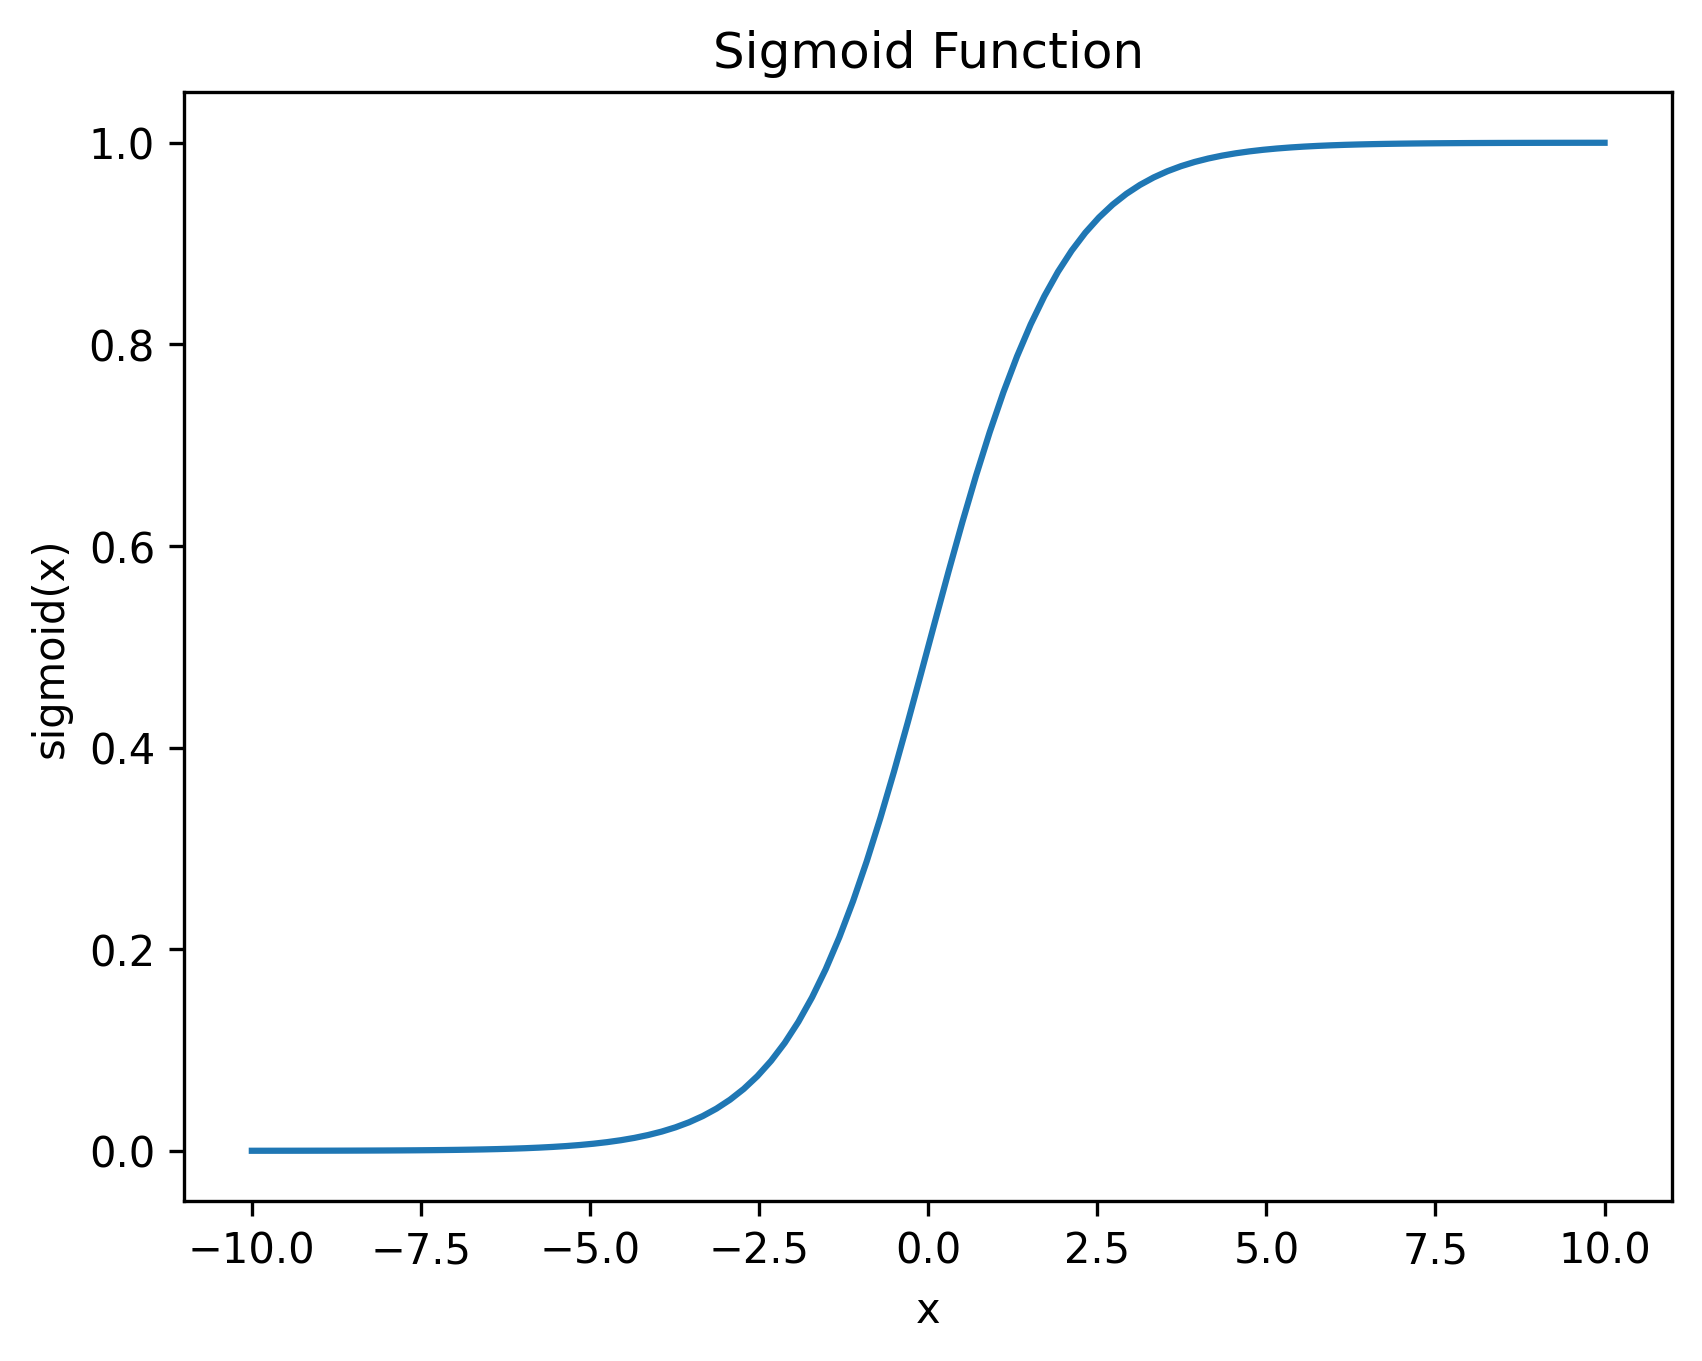

In [49]:
# 生成一些随机数据
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

# 绘制sigmoid函数曲线
plt.figure(dpi=300)#指定图像大小
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.savefig('figs/3-3.png', dpi=300)
plt.show()

# 演示逻辑回归

In [50]:
import pandas as pd
data = pd.read_csv('admission.csv')
data #这里我们加一行代码查看数据

,ExamScore,Admitted
0,78,0
1,82,1
2,90,1
3,85,1
4,75,0
5,73,0


In [51]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [54]:
new_data = np.array([[80]])#这里修改了原代码
prediction = classifier.predict(new_data)
print("Prediction:", prediction)

Prediction: [0]


# 演示predict_proba

In [55]:
# 预测概率，这里要修改一下对象名
y_pred_proba = classifier.predict_proba(new_data)

# 输出预测概率
print(y_pred_proba)

[[0.50000003 0.49999997]]


In [56]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_1860\4226070748.py:6: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [57]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

In [58]:
# 训练线性回归模型
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [59]:
# 训练岭回归模型
ridge_reg = Ridge(alpha=100.0)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=100.0)

In [60]:
# 对测试集进行预测
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)

In [61]:
# 计算均方误差
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [62]:
print("线性回归模型的均方误差为：", mse_linear)
print("岭回归模型的均方误差为：", mse_ridge)

线性回归模型的均方误差为： 29.7822450923025
岭回归模型的均方误差为： 33.27361683031236


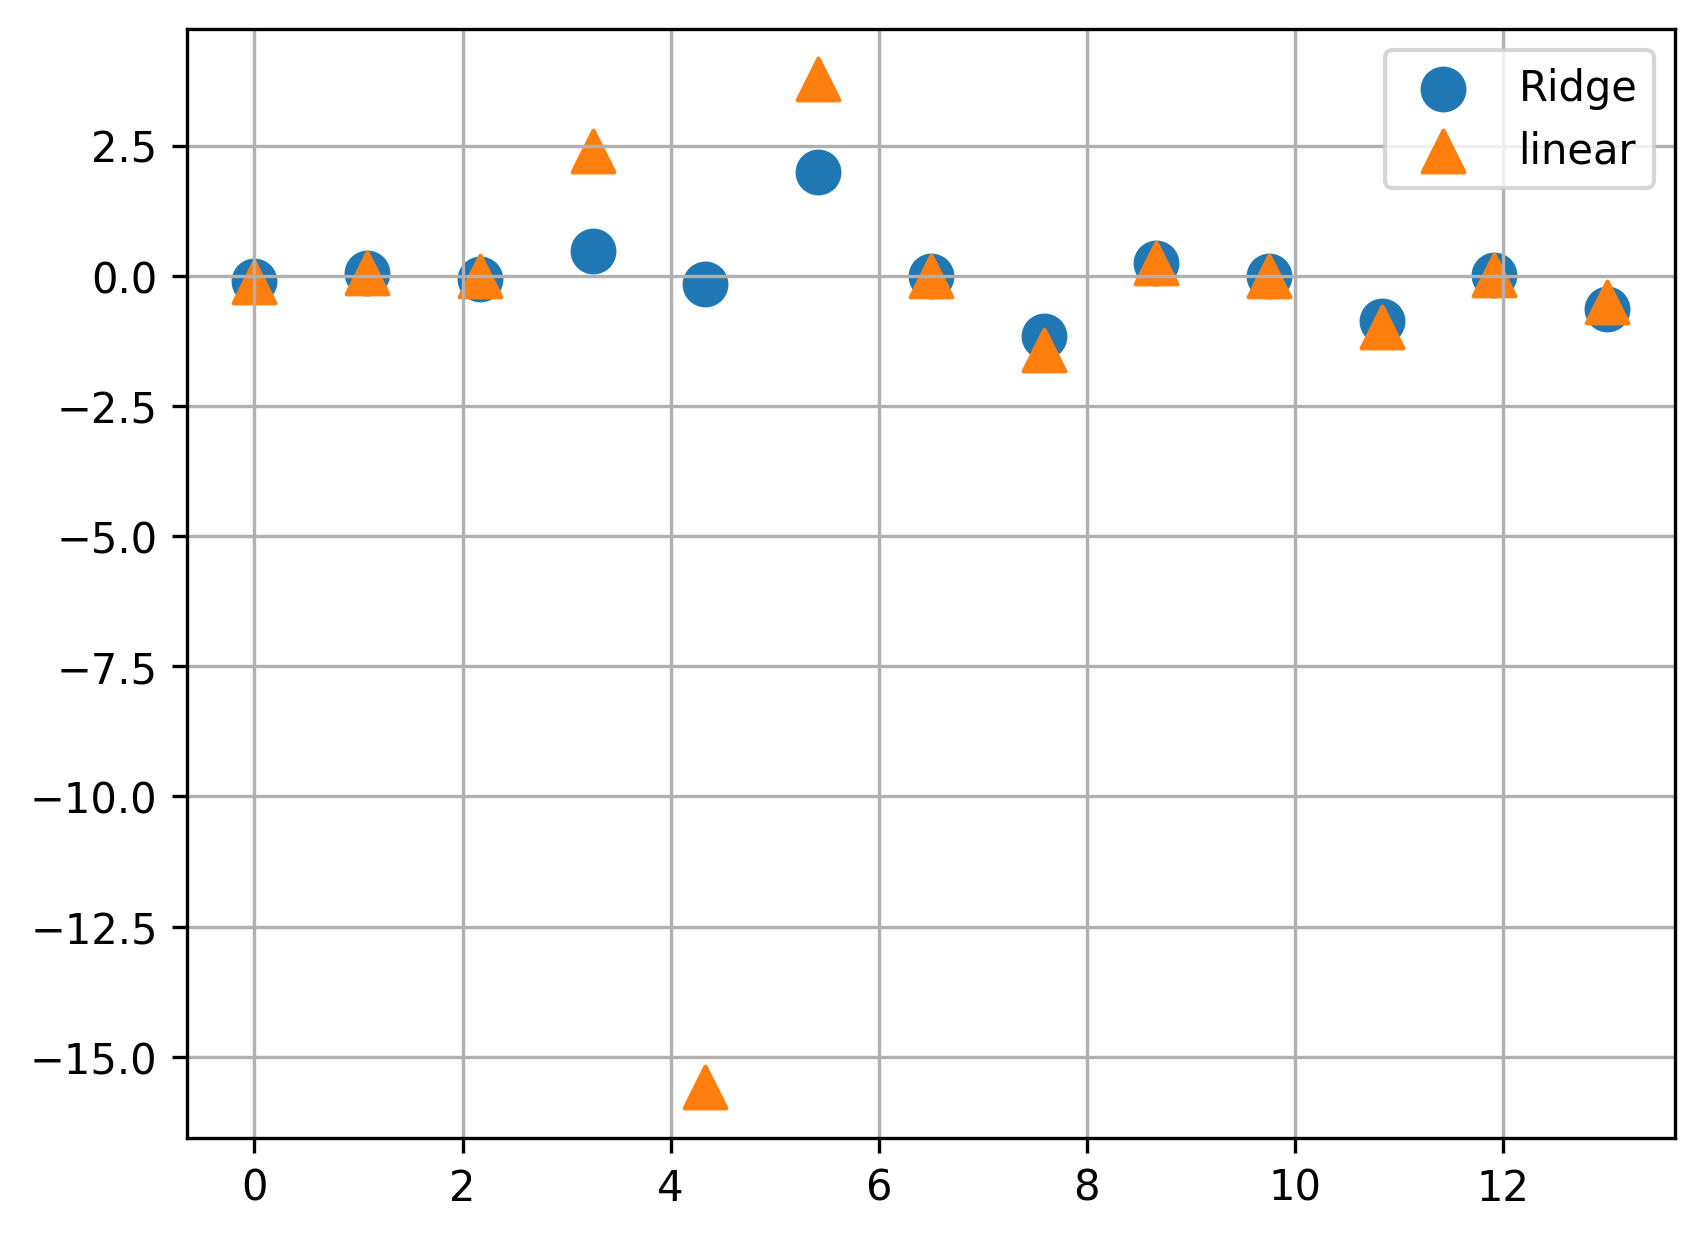

In [63]:
plt.figure(dpi=300)
plt.scatter(np.linspace(0,X_train.shape[1],13), 
            ridge_reg.coef_, label='Ridge',
           s = 100)
plt.scatter(np.linspace(0,X_train.shape[1],13), 
            linear_reg.coef_, 
            marker='^', label='linear',
           s = 100)
plt.legend()
plt.grid()
plt.savefig('figs/3-4.png', dpi=300)
plt.show()

In [64]:
from sklearn.linear_model import Lasso

# 初始化Lasso模型并设置正则化系数
model = Lasso(alpha=10)

# 训练模型
model.fit(X_train, y_train)

# 输出模型的系数和截距
print(model.coef_)
print(model.intercept_)

[-0.          0.03268741 -0.          0.          0.          0.
  0.         -0.          0.         -0.01155885 -0.          0.00679306
 -0.54971245]
31.341267677598346


In [65]:
# 计算模型在测试集上的均方误差
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  49.09161621793307


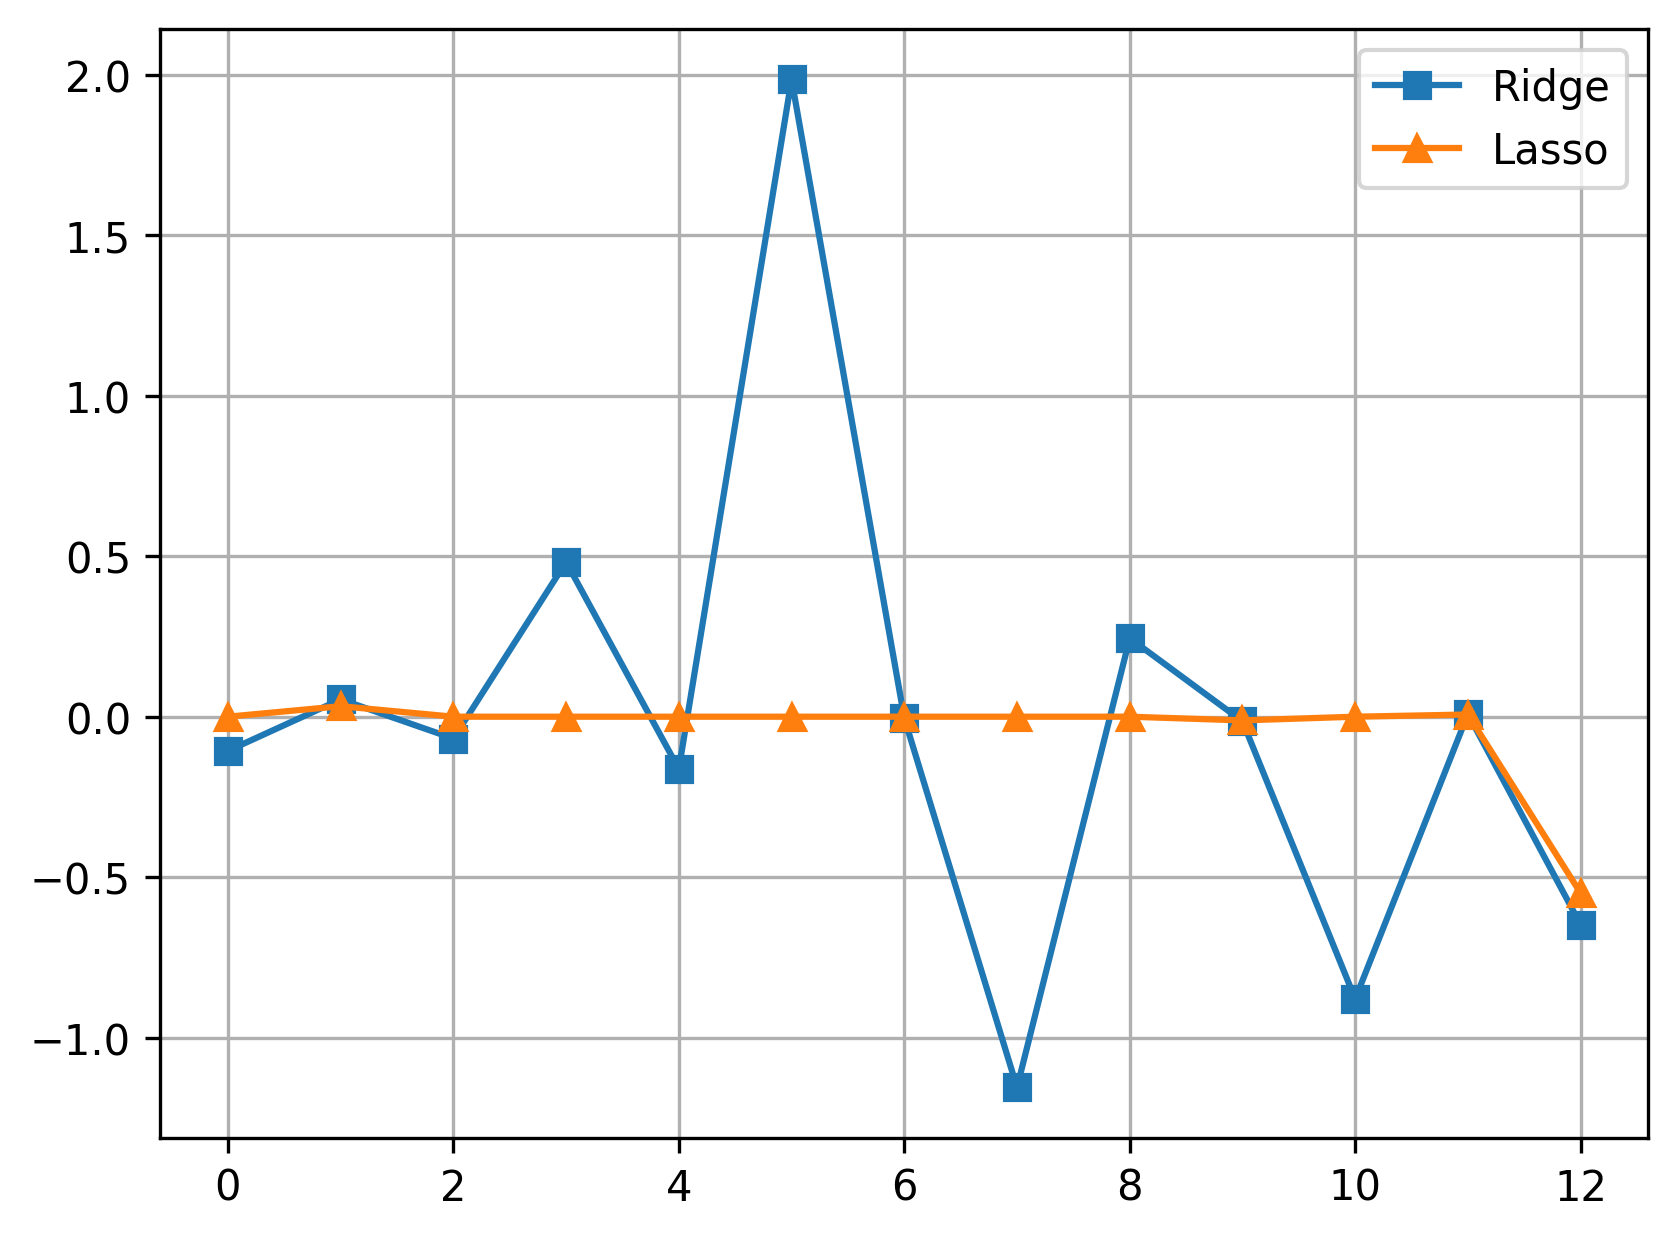

In [66]:
# 绘制模型的系数分布图
plt.figure(dpi=300)
plt.plot(ridge_reg.coef_, marker='s',label='Ridge')
plt.plot(model.coef_, marker='^', label='Lasso')
plt.legend()
plt.grid()
plt.savefig('figs/3-5.png', dpi=300)
plt.show()